# HMMA238 - TP Noté - Fanchon Herman

# Le jeu de la vie

In [1]:
import utils
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Image
import numpy as np

### Question 1, 2 et 3 : 


* Création des variables filename, taille_str et ma_graine.

In [2]:
filename = "HMMA238_TP_fanchonherman.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("La variable taille_str vaut ", taille_str)
print("La variable ma_graine vaut ", ma_graine)

La variable taille_str vaut  30
La variable ma_graine vaut  0


## Implémentation sans numpy

* Définissons la fonction calcul_nb_voisins: elle permet de calculer le nombre de voisins vivants pour chaque cellule,
* Application de cette fonction et explications.

### Question 4

In [66]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + 0 + Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [67]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
N = calcul_nb_voisins(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


La sortie obtenue représente le nombre de voisins vivants pour chaque cellule de Z.
Ci-dessous, une représentation de la liste de listes Z et N en superposition: 
les couleurs rouges et bleues correspondent à l'initialisation du jeu (i.e la matrice Z) et  les numéros dans les cellules correspondent au nombre de voisins vivants de cette cellule après une itération (i.e la matrice N)

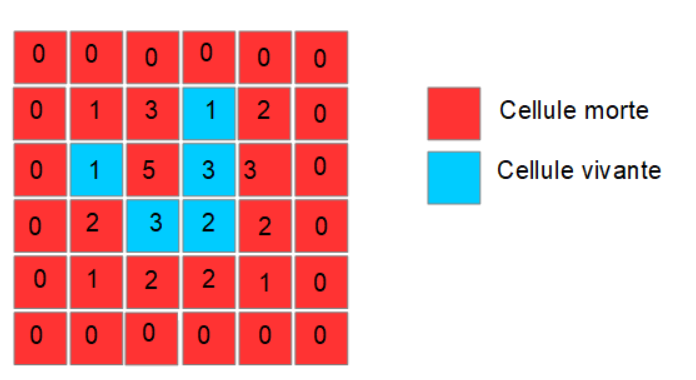

In [5]:
Image(filename='img.PNG')

* Définissons la fonction iteration_jeu.

In [68]:
def iteration_jeu(Z):
    """
    Cette fonction permet d'effectuer une itération du jeu de la vie.
    Les boucles ne prennent pas en compte les pourtours de la grille car
    considéré inactif/mort.
    En entrée on a une liste de listes représentant l'initialisation du jeu.
    En sortie on a une liste de listes représentant le jeu à l'étape suivante.
    Ce code effectue les 4 transitions décrites dans le sujet du TP.
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

### Question 5 et 6

* Affichage des étapes du jeu de 0 à 9 itérations,
* Remarques sur les itérations.

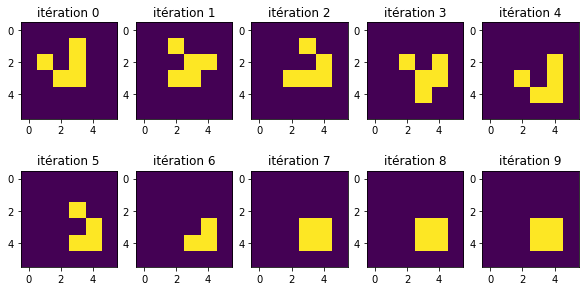

In [69]:
utils.affichage_iterations(Z, iteration_jeu)

Premièrement, entre l'iteration 0 et 4, on constate que l'on obtient la même chose à quelques décalages près.
Ensuite, après l'iteration 7, on constate qu'il n'y a pas de changement, il y a une stabilisation.

## Implémentation avec numpy

### Question 7

In [70]:
vect = np.array([0, 1, 0, 0, 1, 1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
print(vect)
print(nb_vect)

[0 1 0 0 1 1]
[0. 0. 1. 1. 1. 0.]


Le vecteur nb_vect compte le nombre de voisins du vecteur vect en considérant que les bords sont inactifs.
Il permet de compter le nombre de voisins sur une ligne.

### Question 8

* Création de la fonction calcul_nb_voisins_np,
* Application de cette fonction sur un exemple.


In [84]:
def calcul_nb_voisins_np(Z):
    Z = np.array(Z)
    nb_voisins = np.zeros(Z.shape)
    nb_voisins[1:-1, 1:-1] = Z[:-2, :-2] + Z[2:, 2:] + Z[2:, :-2] \
        + Z[:-2, 2:] + Z[1:-1, :-2] + Z[1:-1, 2:] + Z[:-2, 1:-1] + Z[2:, 1:-1]
    return(nb_voisins)

In [85]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

# vérification
np.allclose(calcul_nb_voisins_np(Z), N)

True

### Question 9

* Création de la fonction iteration_jeu_np,
* Application de cette fonction sur un exemple.

In [75]:
def iteration_jeu_np(Z):
    Z = np.array(Z)
    N = calcul_nb_voisins_np(Z)
    for x in range(1, np.shape(Z)[0]-1):
        for y in range(1, np.shape(Z)[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [76]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

# verification
np.allclose(iteration_jeu_np(Z), iteration_jeu(Z))

True

### Question 10

* Création de la fonction jeu_np.

In [13]:
def jeu_np(Z_in, nb_iter):
    for i in range(1, nb_iter+1):
        Z_in = iteration_jeu_np(Z_in)
    return (Z_in)

### Question 11

* Affichage d'un film représentant les itérations du jeu de la vie avec comme initialisation la matrice Z_huge.

In [77]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

<IPython.core.display.Javascript object>


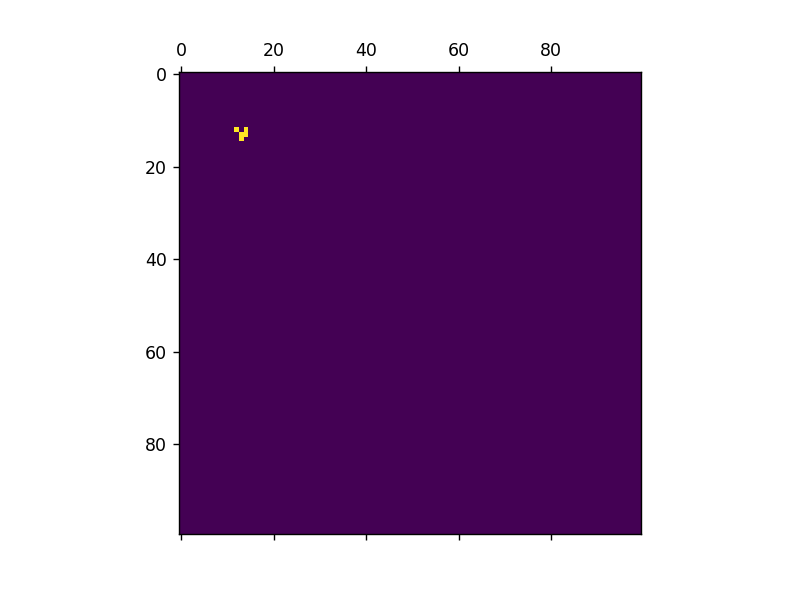

In [79]:
%matplotlib notebook
utils.animation_mat(Z_huge, jeu_np)

### Question 12

* Création d'une matrice aléatoire,
* Affichage d'un film représentant les itérations du jeu de la vie avec comme initialisation la matrice aléatoire.

In [80]:
prop_active = (1 + ma_graine) * 10 / 100
print("La variable prop_active vaut ", prop_active)

A = np.random.binomial(n=1, p=0.1, size=98*98).reshape(98, 98)
mat_alea = np.zeros((100, 100))
mat_alea[1:-1, 1:-1] = A
print(mat_alea)

La variable prop_active vaut  0.1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


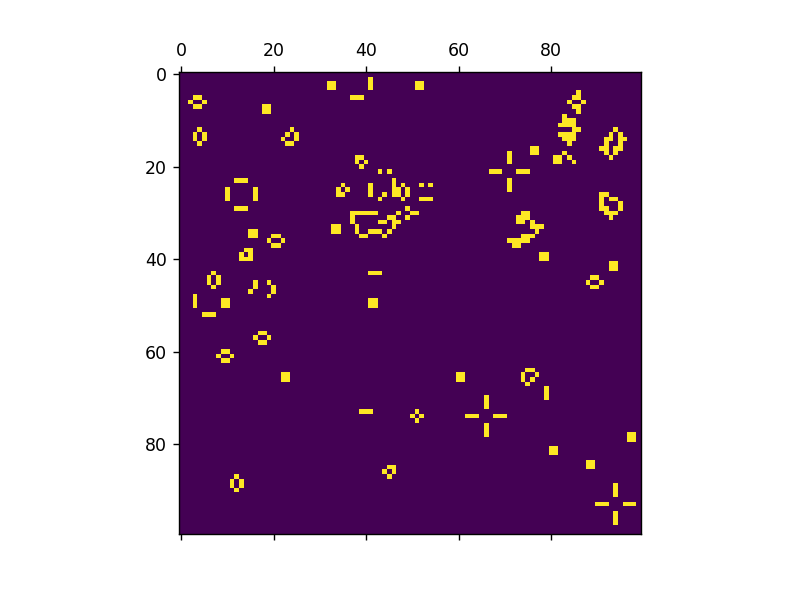

In [81]:
utils.animation_mat(mat_alea, jeu_np)

### Question 13

* Affichage de 10 itérations de 3 jeux fixes dans le temps,
* Affichage de 10 itérations d'un jeu oscillant de période 2.

#### Jeux fixes dans le temps (block, bee-hive et tub)

<IPython.core.display.Javascript object>


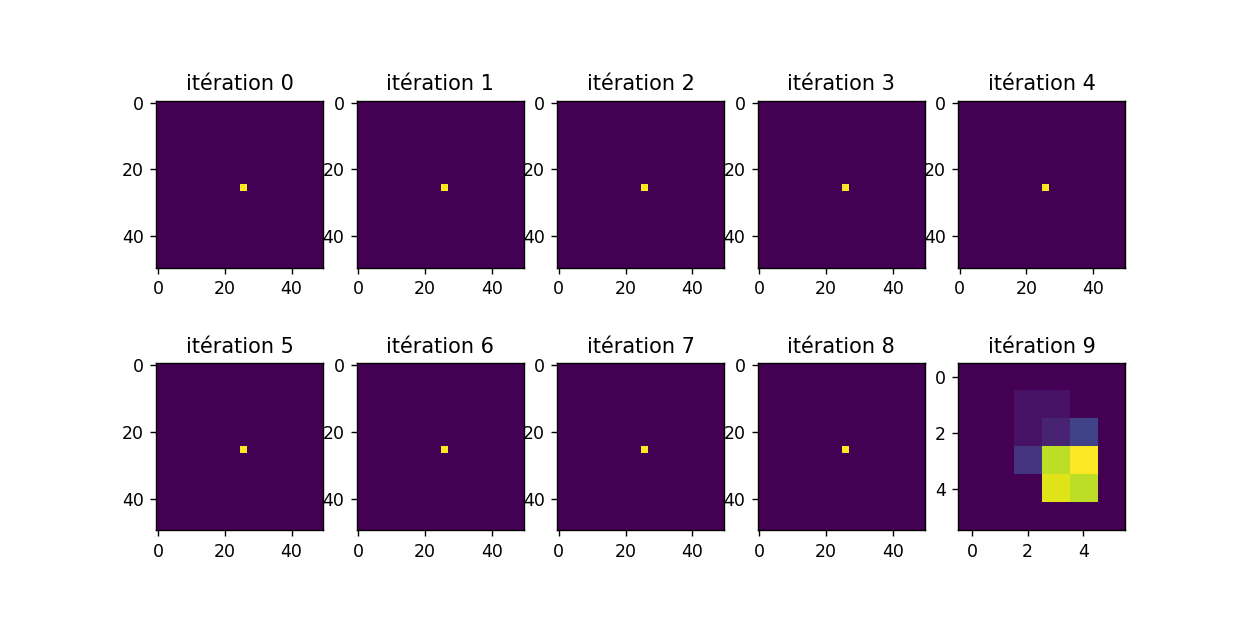

In [82]:
mat1 = np.zeros((50, 50))
mat1[25, 25] = mat1[25, 26] = mat1[26, 25] = mat1[26, 26] = 1
utils.affichage_iterations(mat1, iteration_jeu)

In [86]:
mat2 = np.zeros((50, 50))
mat2[25, 25] = mat2[25, 26] = mat2[26, 24] = mat2[26, 27] = mat2[27, 25] = \
               mat2[27, 26] = 1
utils.affichage_iterations(mat2, iteration_jeu)

<IPython.core.display.Javascript object>

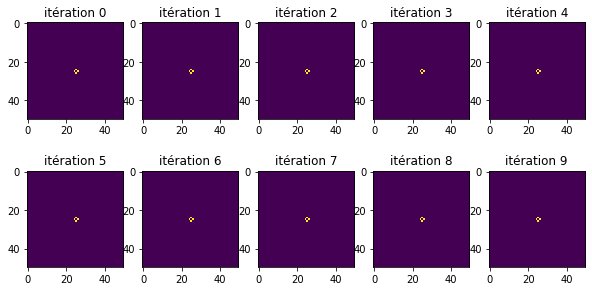

In [19]:
mat3 = np.zeros((50, 50))
mat3[25, 24] = mat3[25, 26] = mat3[24, 25] = mat3[26, 25] = 1
utils.affichage_iterations(mat3, iteration_jeu)

#### Jeu oscillant de période 2

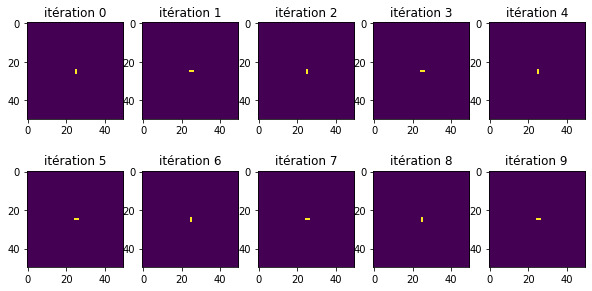

In [20]:
mat4 = np.zeros((50, 50))
mat4[25, 25] = mat4[24, 25] = mat4[26, 25] = 1
utils.affichage_iterations(mat4, iteration_jeu)

### Question 14

* Création du jeu sous forme de classe 
* Application

In [58]:
class JeuDeLaVie:

    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n_1, n_2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))

    def play(self):
        t = 1
        while (t <= self._time_T):
            self._historic_state[:, :, t] = iteration_jeu_np(
                self._historic_state[:, :, t-1])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t = t + 1

    def plot(self):
        plt.imshow(self.average_life)

In [83]:
toto = JeuDeLaVie(np.array(Z), 20)
toto.play()
toto.plot()

### Question bonus

* Modification des fonctions jeu_np, iteration_jeu_np et calcul_nb_voisins_np afin d'effectuer le jeu sur un tore.

In [ ]:
#def calcul_voisins_tore(Z):